In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MYVmXWbGLhH5OWvCFPDd")
project = rf.workspace("test-ec3f1").project("nowa-heksy")
dataset = project.version(1).download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Suc

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Nowa---heksy-1 in yolov8:: 100%|██████████| 1580/1580 [00:00<00:00, 6998.01it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True batch = 32

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
                   2_4        155          2          1          0      0.995      0.995
                   2_5        155          3          1          0      0.995      0.995
                   3_0        155          2      0.859          1      0.995      0.925
                   3_1        155          1      0.769          1      0.995      0.995
                   3_3        155          4          1       0.28      0.995      0.995
                   3_4        155          2      0.958          1      0.995      0.995
                   3_5        155          2      0.869          1      0.995      0.995
                   4_0        155          1      0.805          1      0.995      0.895
                   4_1        155          2      0.855          1      0.995      0.995
                   4_2        155          2      0.898          1      0.995      0.995
                   4_3        155          3 

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1697562175.3890b17ed06a.1331.0  train_batch1620.jpg    val_batch1_pred.jpg
F1_curve.png					    train_batch1621.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch1622.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch1.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


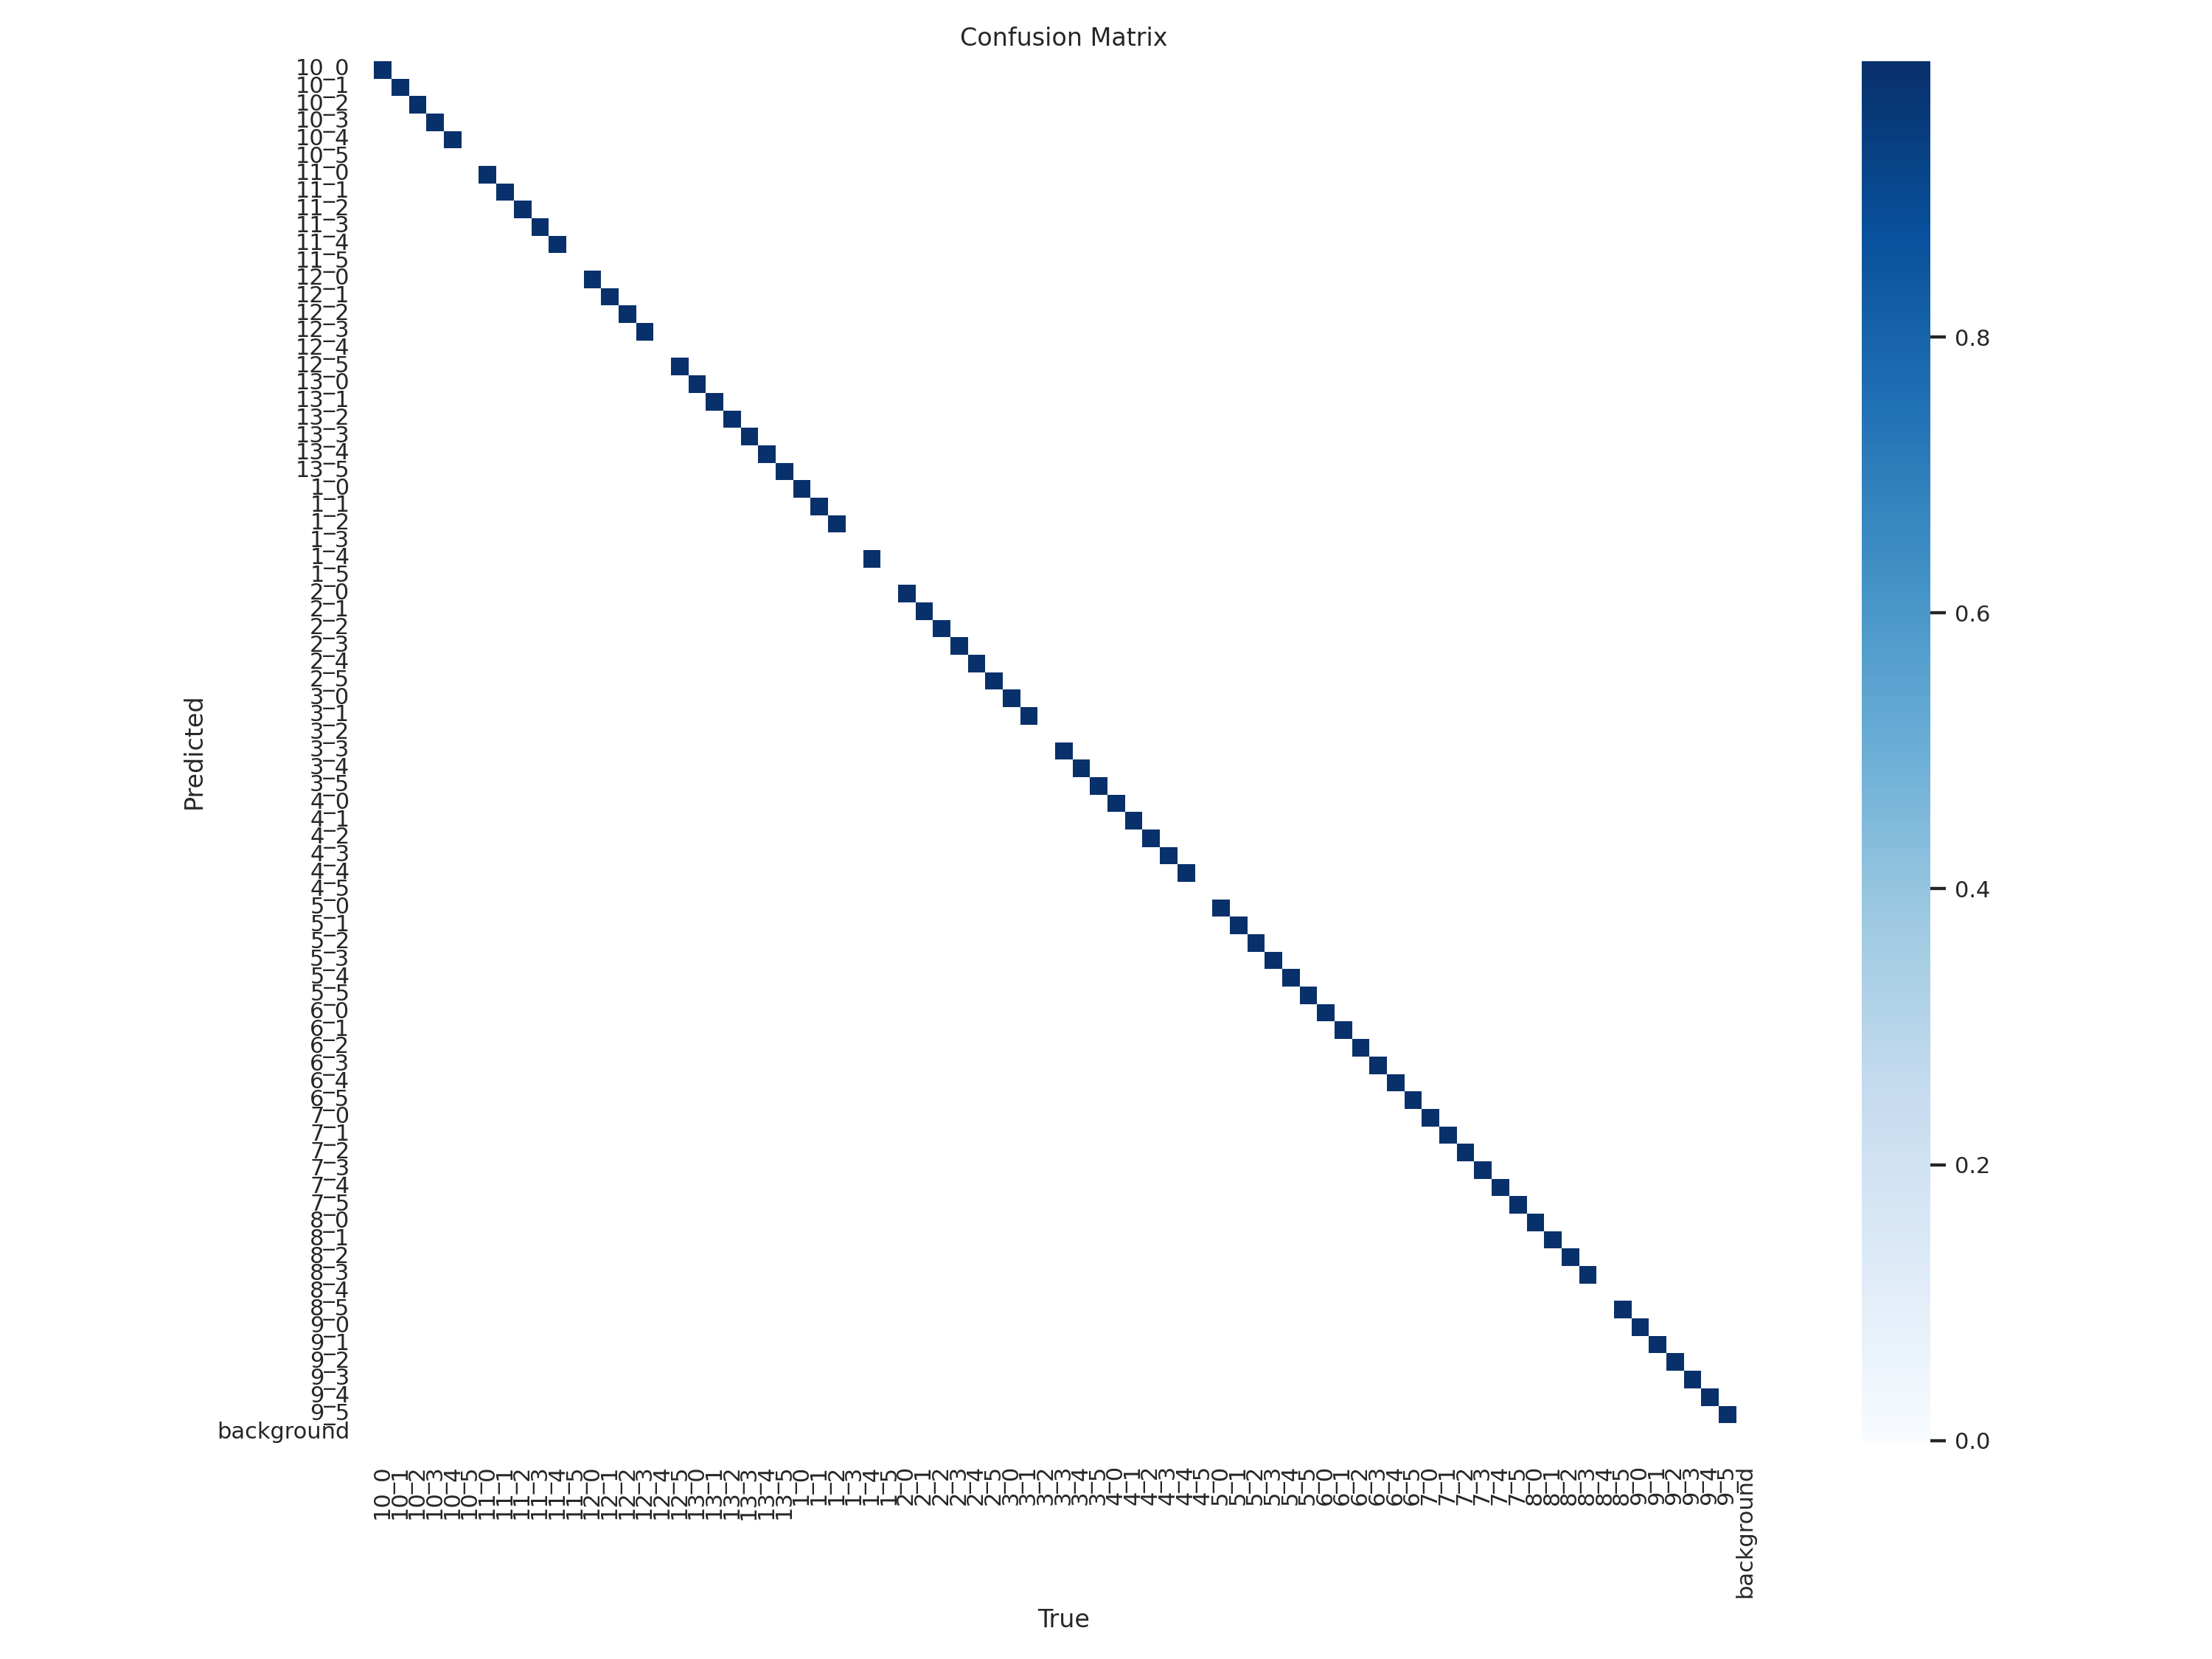

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


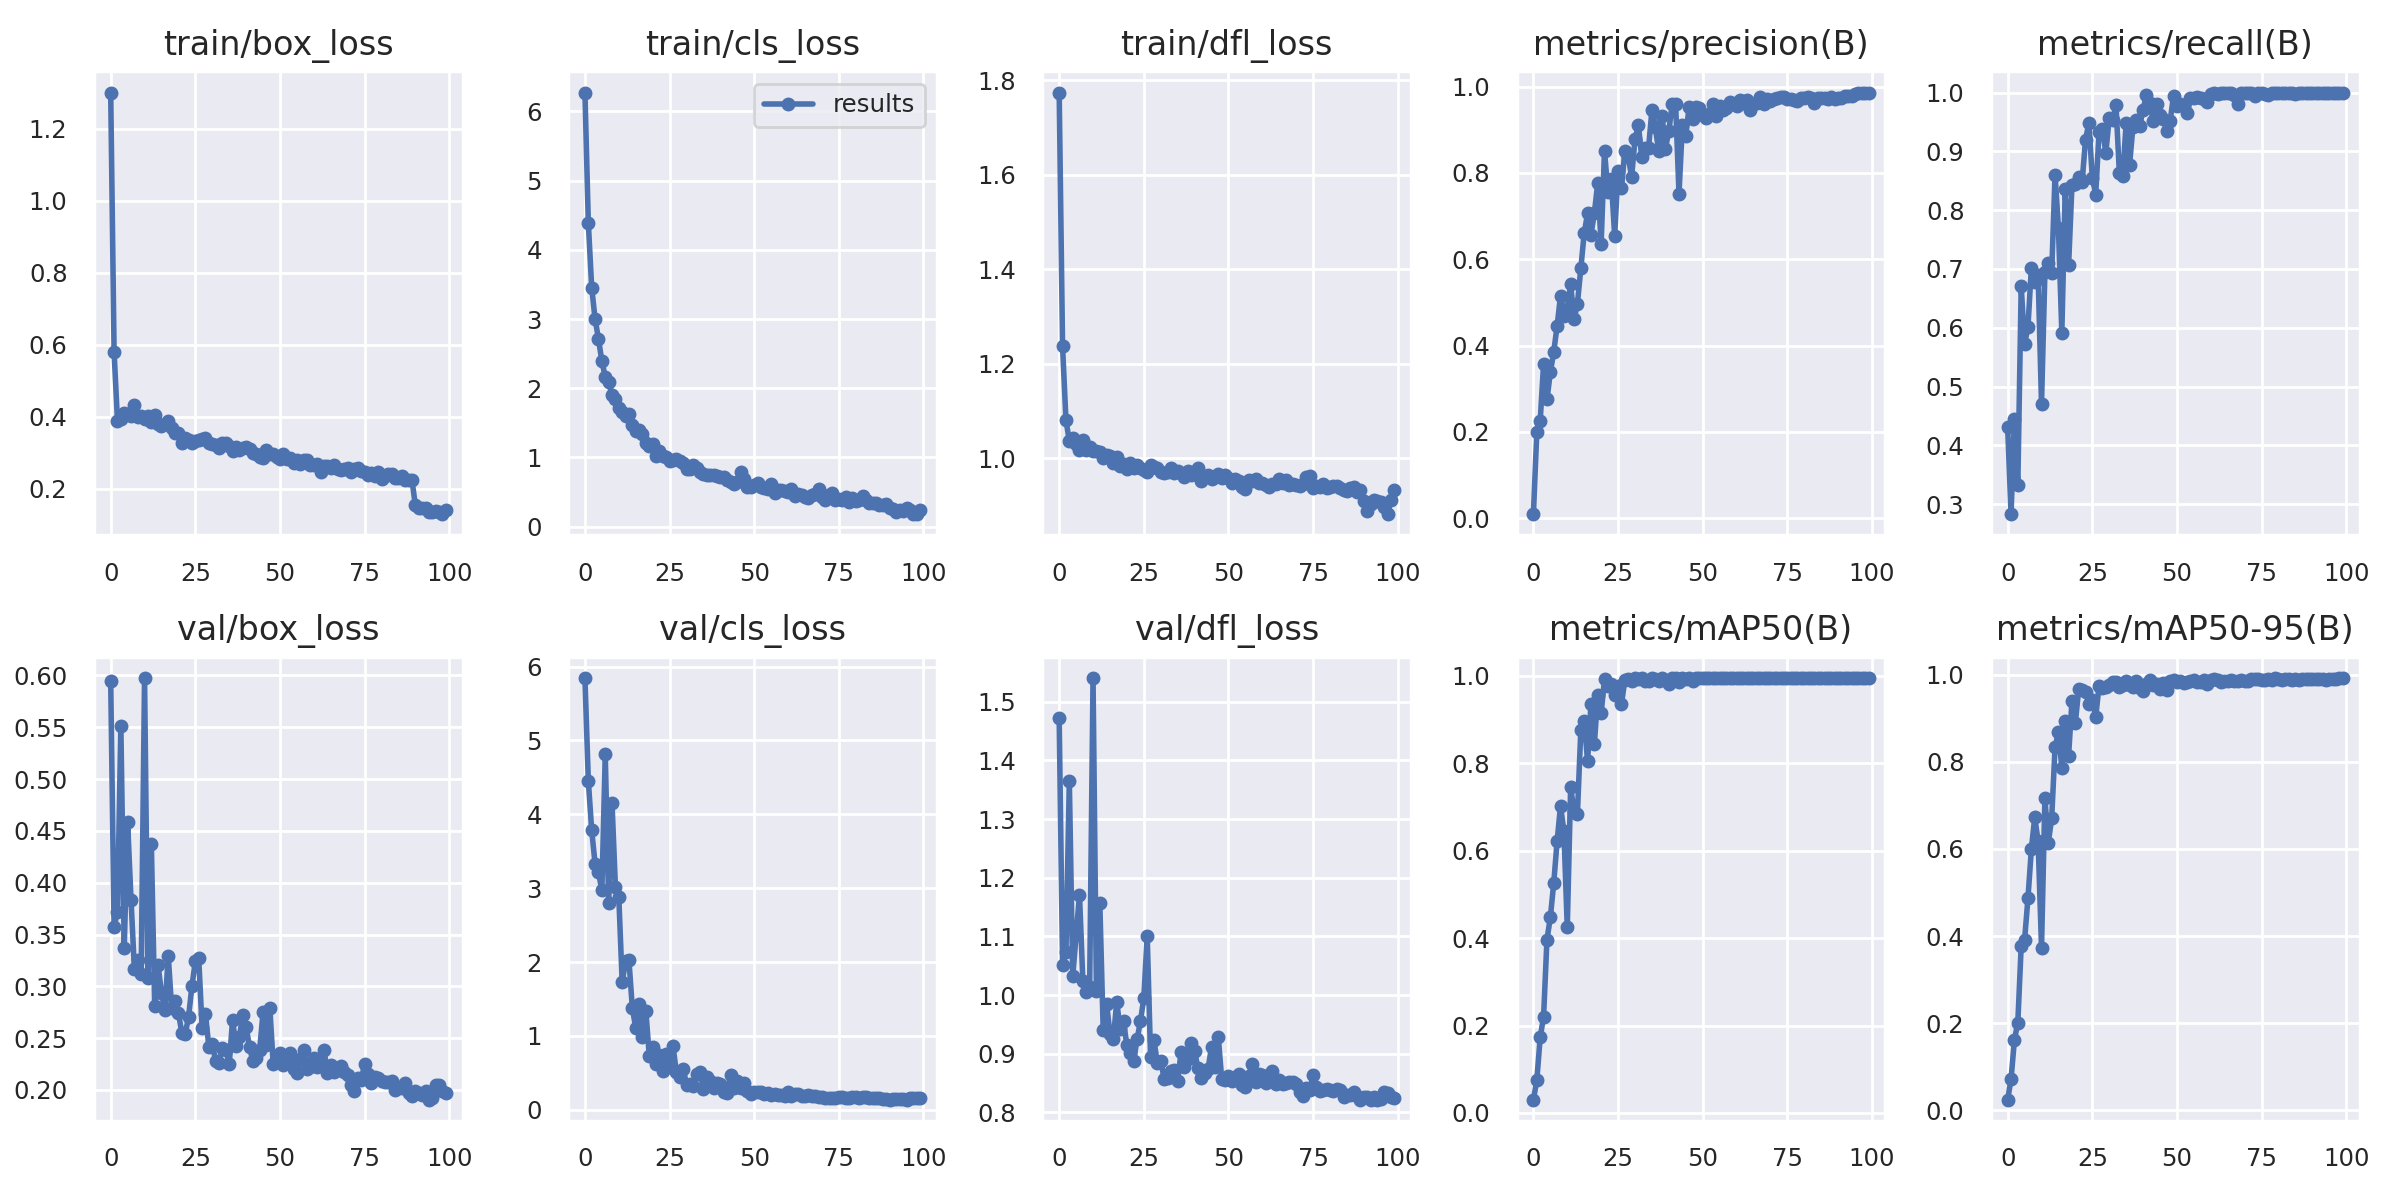

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


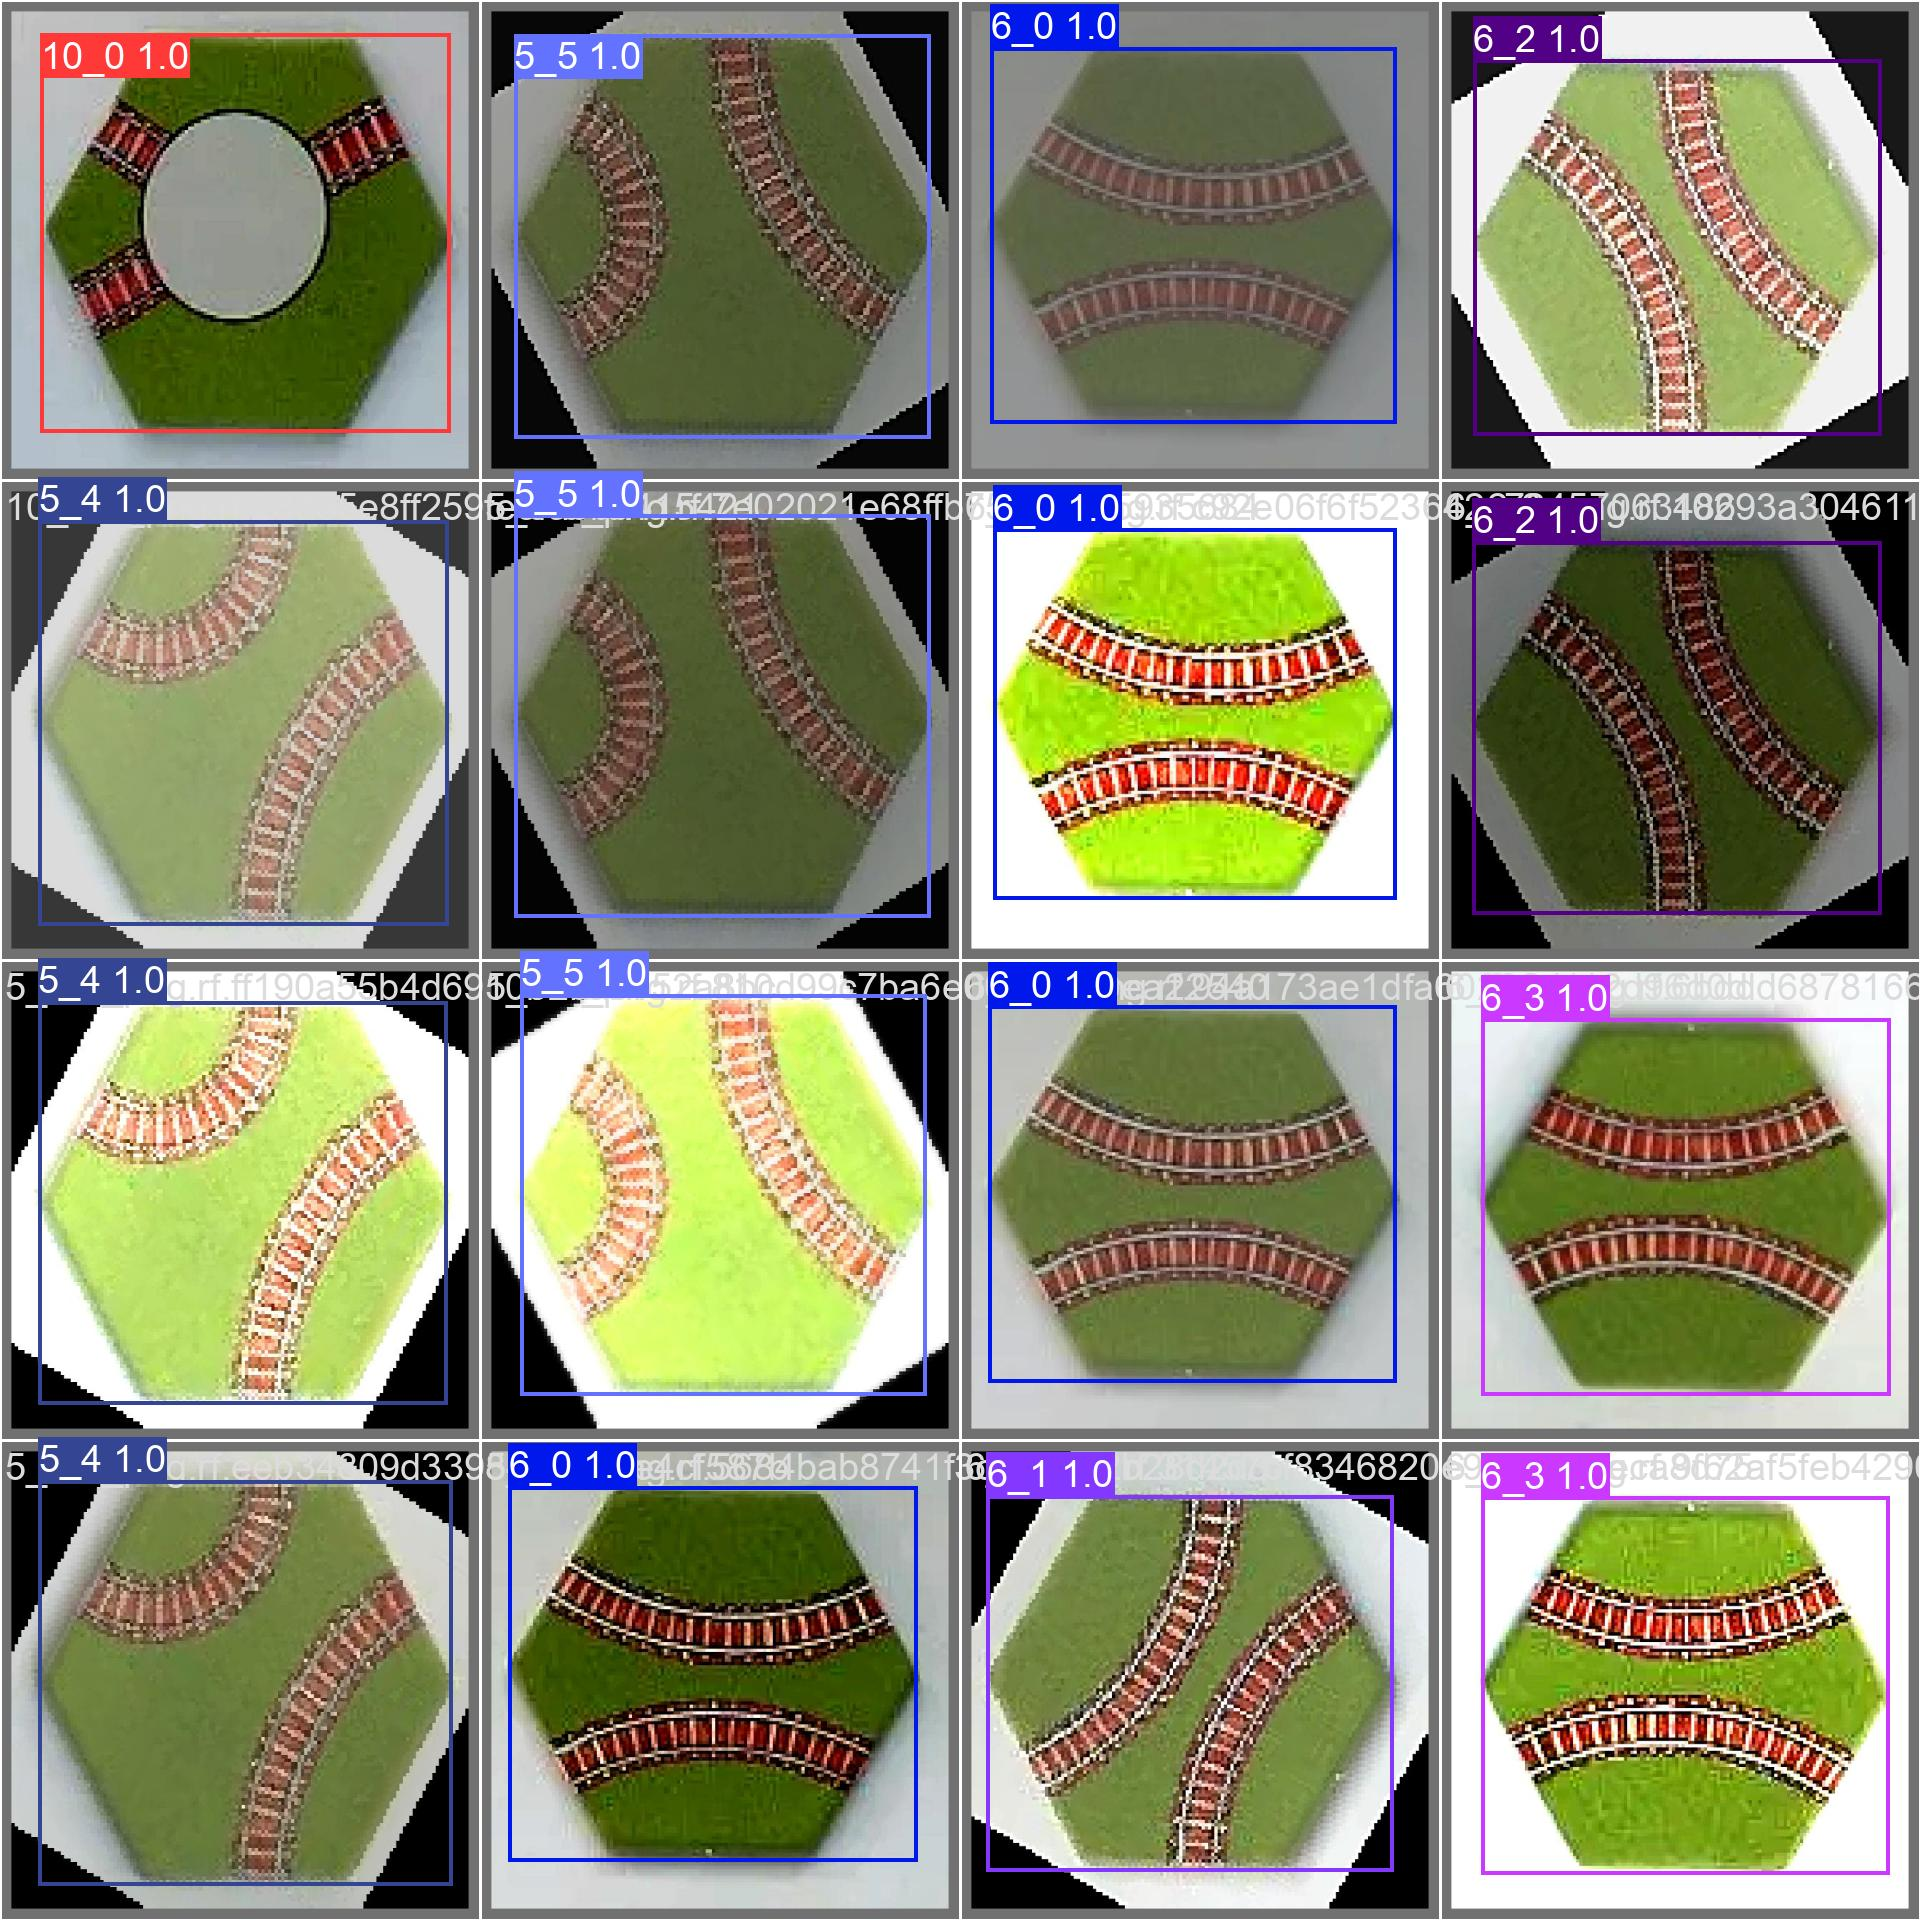

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-20 18:42:51.972303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 18:42:53.047265: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11155770 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/Nowa---heksy-1/valid/labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100% 155/155 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:05<00:00,  2.00it/s]
                   all        155        155      0.986          1      0.995      0.992
                  10_0     

## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True save_txt=True

/content
2023-10-20 19:15:38.419139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 19:15:39.493155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11155770 parameters, 0 gradients, 28.6 GFLOPs
image 1/82 /content/datasets/Nowa---heksy-1/test/images/10_1-1_png.rf.8bc6ae74ec0de520cb45b17b43c3ba2f.jpg: 640x640 1 10_1, 16.4ms
image 2/82 /content/datasets/Nowa---heksy-1/test/images/10_2__png.rf.195b39b82a5f9a2ea3cab10712526b1c.jpg: 640x640 1 10_2, 16.5ms
image 3/82 /content/datasets/Nowa---heksy-1/test/images/10_3-8_png.rf.2200bbe4e1ab9440c8125da01d761432.jpg: 640x640 1 

**NOTE:** Let's take a look at few results.

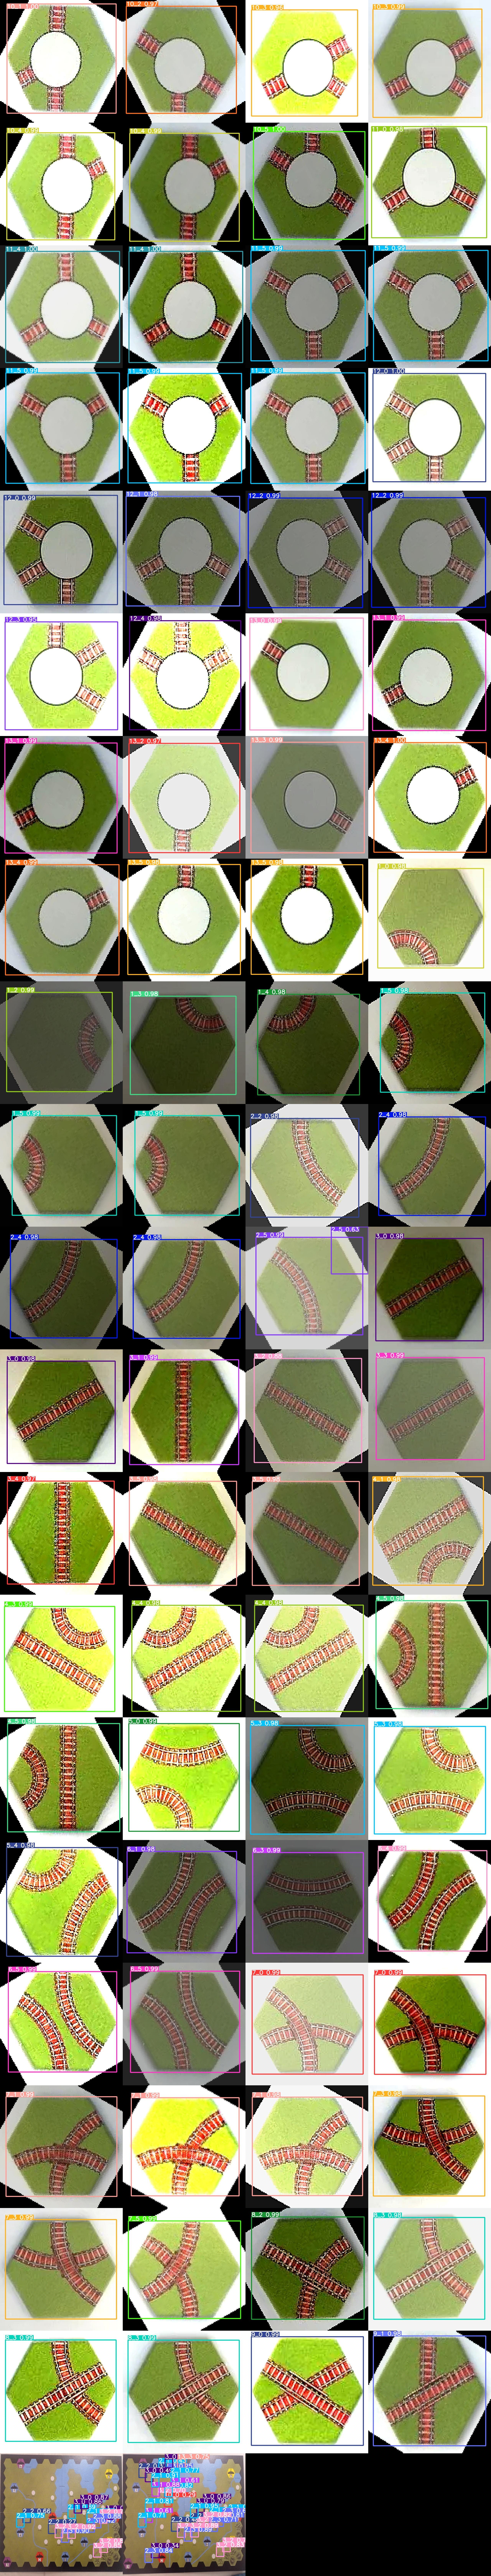

In [29]:
from PIL import Image as PILImage
import glob
from IPython.display import Image, display

folder_path = '/content/runs/detect/predict3/'
jpg_files = glob.glob(f'{folder_path}*.jpg')
jpg_files.sort()

columns = 4
rows = len(jpg_files) // columns + 1
image_width = 640
image_height = 640

grid_width = columns * image_width
grid_height = rows * image_height

merged_image = PILImage.new('RGB', (grid_width, grid_height))

for i, file_path in enumerate(jpg_files):
    image = PILImage.open(file_path)
    image = image.resize((image_width, image_height))
    row = i // columns
    col = i % columns
    merged_image.paste(image, (col * image_width, row * image_height))

merged_image.save("połączone_zdjęcie2.jpg")
display(Image(filename='połączone_zdjęcie2.jpg', width=600))

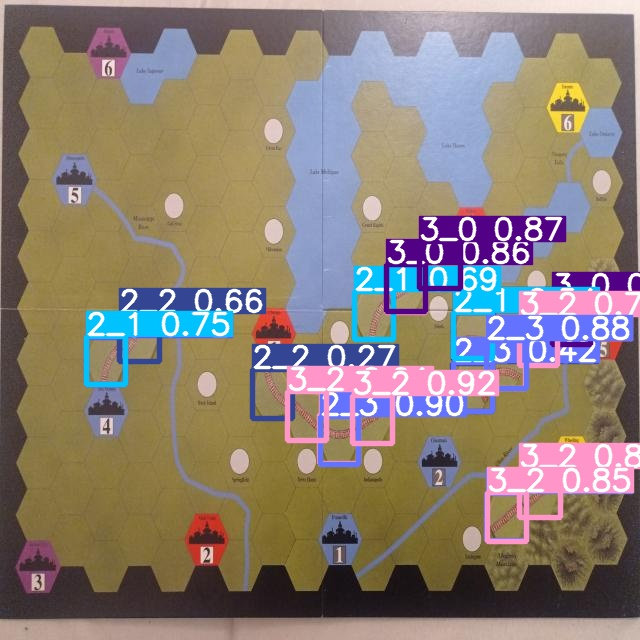

In [30]:
display(Image(filename='/content/runs/detect/predict/IMG_20231012_210025_jpg.rf.a5b1babe06c04d098626900d2d121e2c.jpg'))

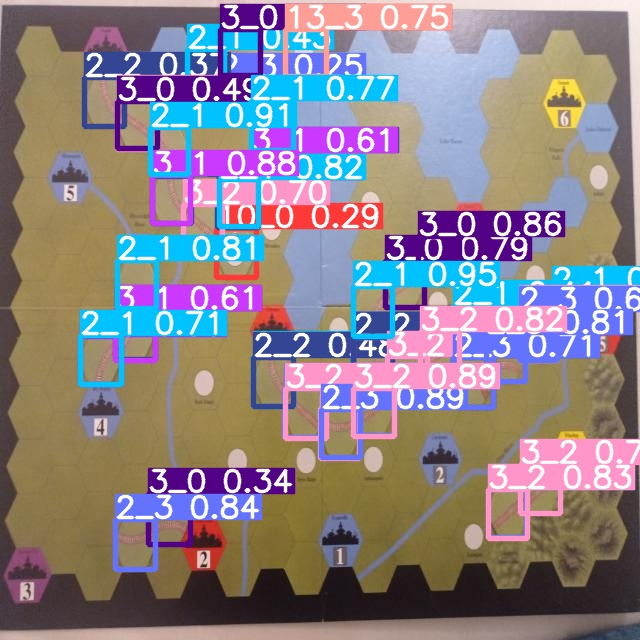

In [46]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/predict/IMG_20231012_210315_jpg.rf.6d3af08fd8a1420847552a273c3fb57b.jpg'))

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
textsize is deprecated and will be removed in 

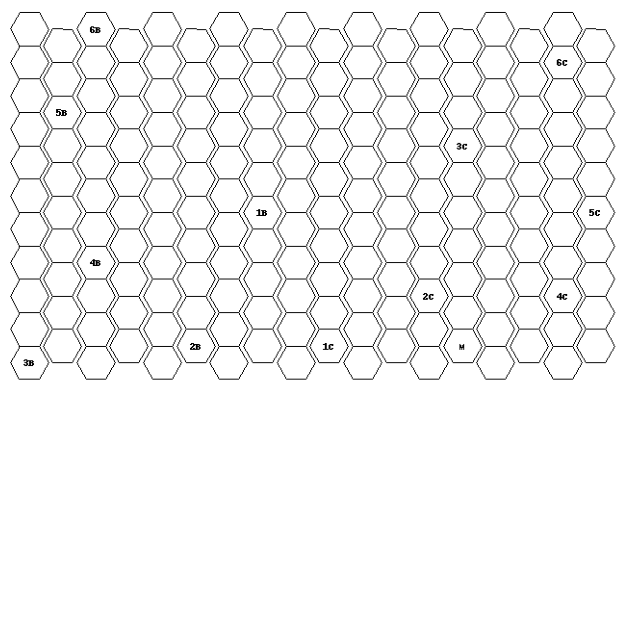

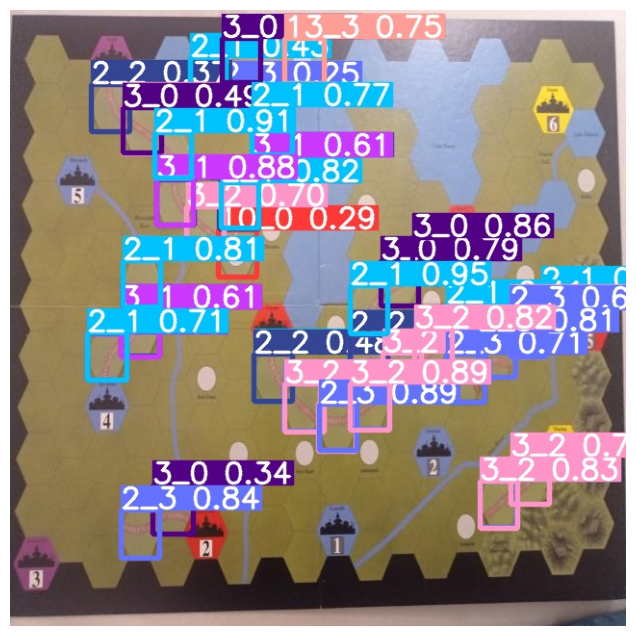

In [190]:
from PIL import Image, ImageDraw, ImageFont
import math

# Rozmiar planszy
szerokosc = 640
wysokosc = 640

# Liczba kolumn i wierszy w planszy
liczba_kolumn = 18
wiersze_w_kolumnach = [11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11,10,11,10,11,10,11,10]
wiersze = 11

# Rozmiar heksów
rozmiar_heksa = 20
odstep = rozmiar_heksa * 3**0.5 / 2  # Odległość między środkami heksów

# Tworzenie obrazu planszy
plansza = Image.new('RGB', (szerokosc, wysokosc), (255, 255, 255))
draw = ImageDraw.Draw(plansza)


tab = [[None for _ in range(liczba_kolumn)] for _ in range(liczba_wierszy)]

tab[5][7]  = "1B"
tab[9][5]  = "2B"
tab[10][0] = "3B"
tab[7][2]  = "4B"
tab[2][1]  = "5B"
tab[0][2]  = "6B"
tab[9][13] = "M"
tab[9][9]  = "1C"
tab[8][12] = "2C"
tab[3][13] = "3C"
tab[8][16] = "4C"
tab[5][17] = "5C"
tab[1][16] = "6C"


def rysuj_heks(x, y, rozmiar, kat_obrotu, tekst=None):
    x0, y0 = x + rozmiar * math.cos(kat_obrotu), y - rozmiar * math.sin(kat_obrotu)
    x1, y1 = x + rozmiar * math.cos(kat_obrotu + math.radians(60)), y - rozmiar * math.sin(kat_obrotu + math.radians(60))
    x2, y2 = x + rozmiar * math.cos(kat_obrotu + math.radians(120)), y - rozmiar * math.sin(kat_obrotu + math.radians(120))
    x3, y3 = x + rozmiar * math.cos(kat_obrotu + math.radians(180)), y - rozmiar * math.sin(kat_obrotu + math.radians(180))
    x4, y4 = x + rozmiar * math.cos(kat_obrotu + math.radians(240)), y - rozmiar * math.sin(kat_obrotu + math.radians(240))
    x5, y5 = x + rozmiar * math.cos(kat_obrotu + math.radians(300)), y - rozmiar * math.sin(kat_obrotu + math.radians(300))

    points = [x0, y0, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5]
    draw.polygon(points, outline=(0, 0, 0))

    if tekst:
        srodek_x = x
        srodek_y = y
        # Ustaw czcionkę i rozmiar tekstu
        czcionka = ImageFont.load_default()
        # Ustaw kolor tekstu
        kolor_tekstu = (0, 0, 0)
        # Wstaw tekst w środku heksa
        text_width, text_height = draw.textsize(tekst, font=czcionka)
        text_x = srodek_x - text_width // 2
        text_y = srodek_y - text_height // 2
        draw.text((text_x, text_y), tekst, font=czcionka, fill=kolor_tekstu)

# Rysowanie planszy
x = rozmiar_heksa
y = rozmiar_heksa

for i, kolumna in enumerate(range(liczba_kolumn)):
    if i % 2 == 0:
        y = rozmiar_heksa
    else:
        y = rozmiar_heksa + rozmiar_heksa * 3**0.5/2
    for j, wiersze in enumerate(wiersze_w_kolumnach):
        if i < liczba_kolumn and j < wiersze:
            if tab[j][i] is not None:
                if i % 2 != 1 or j!=10:
                  rysuj_heks(x, y, rozmiar_heksa, 0, tekst=tab[j][i])
            else:
                if i % 2 != 1 or j!=10:
                  rysuj_heks(x, y, rozmiar_heksa, 0, tekst="")
        y += odstep * 2
    x += odstep * 2



# Zapisz planszę do pliku
plansza.save('plansza_hex.png')
obraz = Image.open('plansza_hex.png')
obraz2 = Image.open('/content/runs/detect/predict/IMG_20231012_210315_jpg.rf.6d3af08fd8a1420847552a273c3fb57b.jpg')

#Wyświetlanie
fig = plt.figure(figsize=(10, 8))
plt.imshow(obraz)
plt.axis('off')
plt.show()
fig1 = plt.figure(figsize=(10, 8))
plt.imshow(obraz2)
plt.axis('off')
plt.show()